In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Load the Dataset**

In [3]:
df=pd.read_csv('marketing_campaign1.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## **Preprocessing Steps**

In [4]:
# 1. Handling Missing Values
# Identify columns with missing values
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [5]:
# Fill missing values with appropriate strategies (e.g., mean, median, mode, or forward/backward fill)
# Example: Fill missing values in 'Income' with the median
df['Income'].fillna(df['Income'].median(), inplace=True)

<ipython-input-5-9f0ccf241334>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


In [6]:
# 2. Data Type Conversion
# Convert columns to appropriate data types (e.g., datetime, categorical)
# Example: Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [7]:
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,datetime64[ns]
Recency,int64
MntWines,int64


In [8]:
# 3. Feature Engineering
# Create new features from existing ones (e.g., combining columns, calculating ratios)
# Example: Calculate the total number of children
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

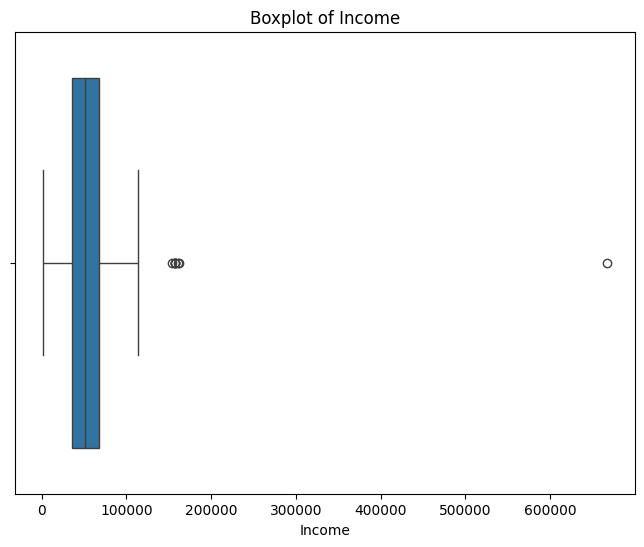

In [9]:
# 4. Outlier Detection and Handling
# Identify outliers using boxplots or other methods
# Example: Create a boxplot for 'Income'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Income'])
plt.title('Boxplot of Income')
plt.show()


# You can repeat the process for other numerical features with potential outliers.


In [10]:
# 4. Outlier Detection and Handling
# Identify and handle outliers (e.g., using boxplots, IQR, or Z-scores)
# Example: Remove outliers in 'Income' using IQR
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]


In [11]:
# 5. Feature Scaling/Normalization
# Scale or normalize numerical features to ensure they have a similar range
# Example: Use Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Income'] = scaler.fit_transform(df[['Income']])

<ipython-input-11-bb6745056adf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'] = scaler.fit_transform(df[['Income']])


In [12]:
# 6. Encoding Categorical Variables
# Convert categorical variables to numerical representations (e.g., one-hot encoding, label encoding)
# Example: One-hot encode 'Education'
df = pd.get_dummies(df, columns=['Education'], prefix=['Education'])

In [13]:
# Select only numeric columns from the dataframe
numeric_df = df.select_dtypes(include=['number'])

# Now calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Select the top 10 features most correlated with 'Response'
relevant_features = correlation_matrix['Response'].sort_values(ascending=False).index[:10]

# Create a new dataframe with the relevant features
df = df[relevant_features]


In [14]:
# Use pandas get_dummies for one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Now calculate the correlation matrix on the encoded dataframe
correlation_matrix = df_encoded.corr()

# Select relevant features
relevant_features = correlation_matrix['Response'].sort_values(ascending=False).index[:10]
df = df[relevant_features]

In [15]:
# 7. Feature Selection
# Select relevant features for the model (e.g., using correlation analysis, feature importance)
# Example: Select features with high correlation with 'Response'
correlation_matrix = df.corr()
relevant_features = correlation_matrix['Response'].sort_values(ascending=False).index[:10]
df = df[relevant_features]

In [16]:
df

,Response,AcceptedCmp5,AcceptedCmp1,AcceptedCmp3,MntMeatProducts,MntWines,NumCatalogPurchases,AcceptedCmp4,Income,AcceptedCmp2
0,1,0,0,0,546,635,10,0,0.503625,0
1,0,0,0,0,6,11,1,0,0.398325,0
2,0,0,0,0,127,426,2,0,0.623933,0
3,0,0,0,0,20,11,0,0,0.222456,0
4,0,0,0,0,118,173,3,0,0.505009,0
...,...,...,...,...,...,...,...,...,...,...
2235,0,0,0,0,182,709,3,0,0.531169,0
2236,0,0,1,0,30,406,2,0,0.556087,0
2237,0,0,0,0,217,908,3,1,0.493295,0
2238,0,0,0,0,214,428,5,0,0.602791,0


In [17]:
correlation_matrix

,Response,AcceptedCmp5,AcceptedCmp1,AcceptedCmp3,MntMeatProducts,MntWines,NumCatalogPurchases,AcceptedCmp4,Income,AcceptedCmp2
Response,1.000000,0.326362,0.293717,0.253953,0.246767,0.246398,0.235217,0.176674,0.174182,0.169175
AcceptedCmp5,0.326362,1.000000,0.402921,0.080057,0.387355,0.472434,0.340226,0.306328,0.416066,0.221453
AcceptedCmp1,0.293717,0.402921,1.000000,0.094512,0.321237,0.353838,0.325152,0.251100,0.342464,0.175231
AcceptedCmp3,0.253953,0.080057,0.094512,1.000000,0.020920,0.061458,0.112299,-0.079820,-0.011288,0.071915
MntMeatProducts,0.246767,0.387355,0.321237,0.020920,1.000000,0.586803,0.704037,0.108193,0.693962,0.045220
MntWines,0.246398,0.472434,0.353838,0.061458,0.586803,1.000000,0.673806,0.372961,0.728168,0.205821
NumCatalogPurchases,0.235217,0.340226,0.325152,0.112299,0.704037,0.673806,1.000000,0.148491,0.706820,0.105662
AcceptedCmp4,0.176674,0.306328,0.251100,-0.079820,0.108193,0.372961,0.148491,1.000000,0.230875,0.292141
Income,0.174182,0.416066,0.342464,-0.011288,0.693962,0.728168,0.706820,0.230875,1.000000,0.110074
AcceptedCmp2,0.169175,0.221453,0.175231,0.071915,0.045220,0.205821,0.105662,0.292141,0.110074,1.000000


## **EDA Steps**

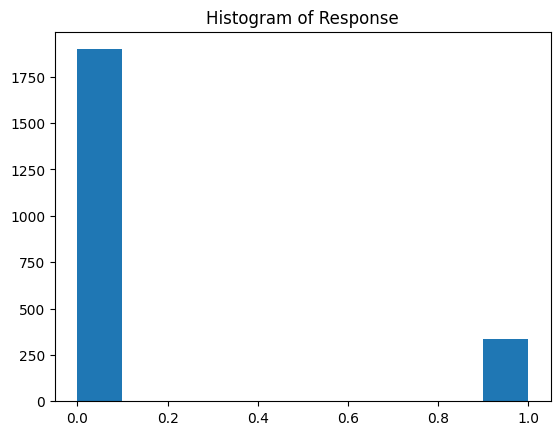

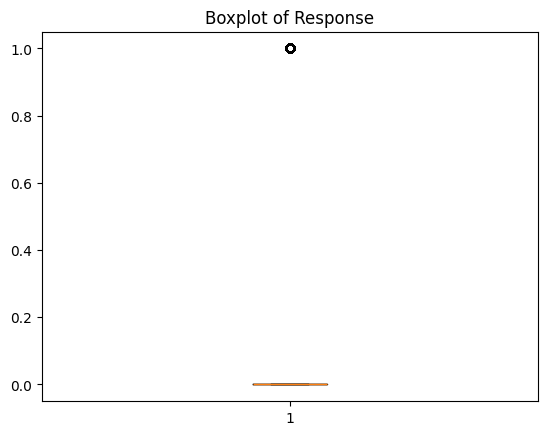

count    2232.000000
mean        0.149642
std         0.356800
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Response, dtype: float64


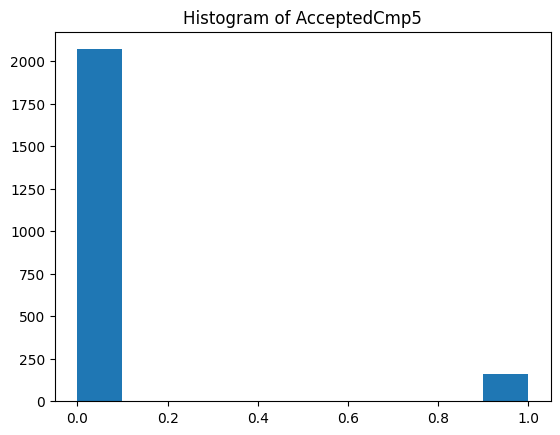

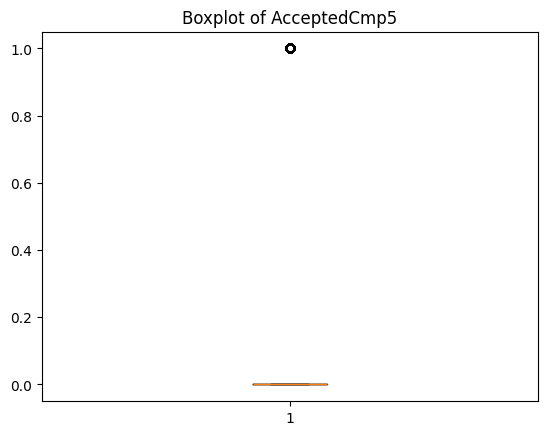

count    2232.000000
mean        0.073029
std         0.260242
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp5, dtype: float64


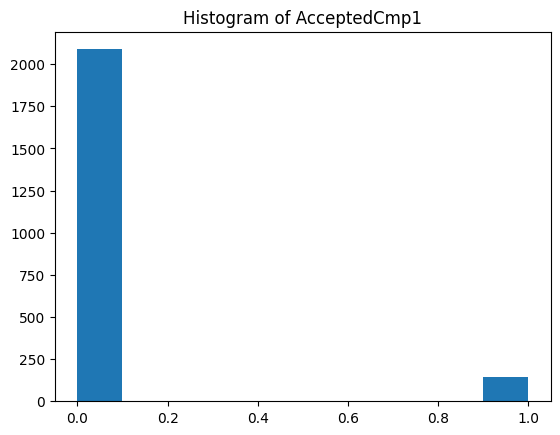

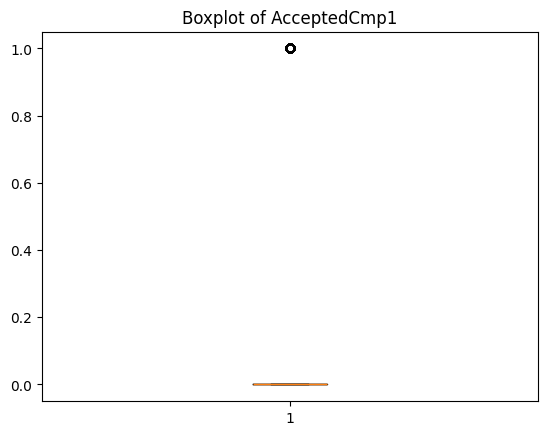

count    2232.000000
mean        0.064516
std         0.245725
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp1, dtype: float64


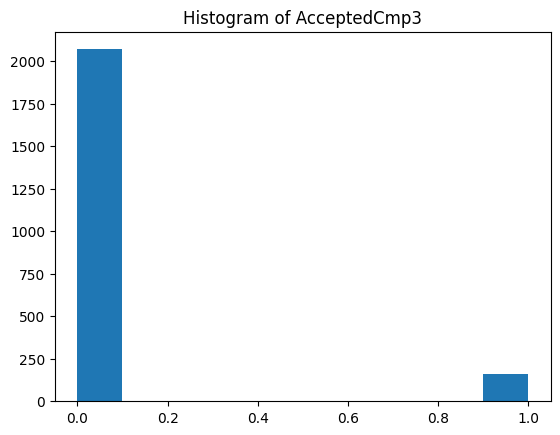

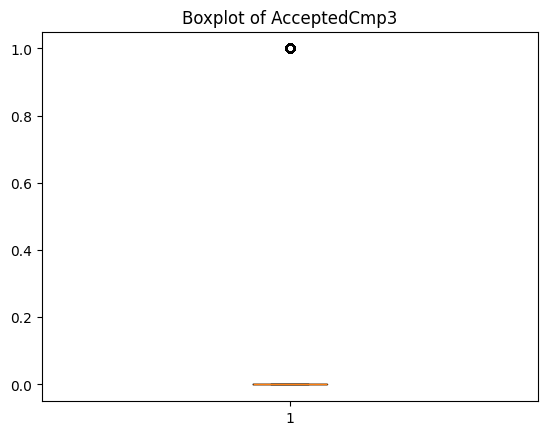

count    2232.000000
mean        0.073029
std         0.260242
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp3, dtype: float64


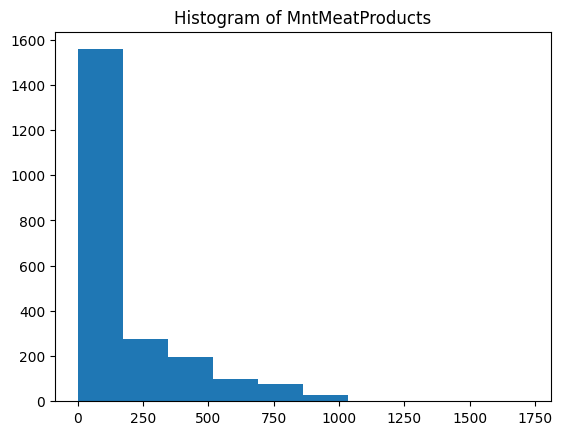

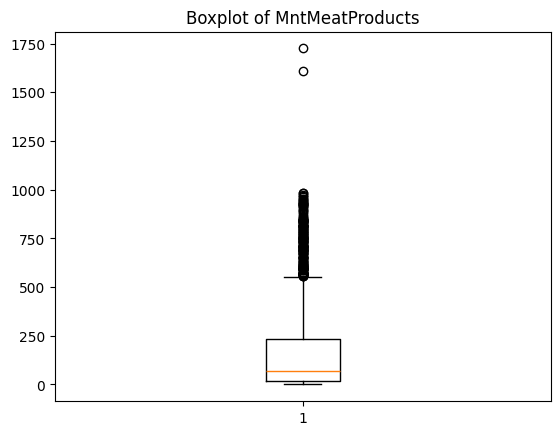

count    2232.000000
mean      165.319444
std       219.401447
min         0.000000
25%        16.000000
50%        67.000000
75%       231.250000
max      1725.000000
Name: MntMeatProducts, dtype: float64


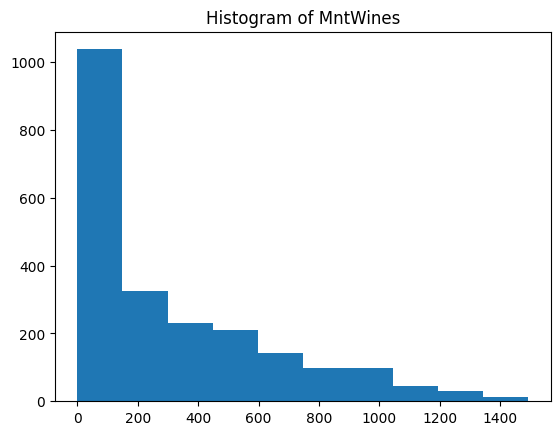

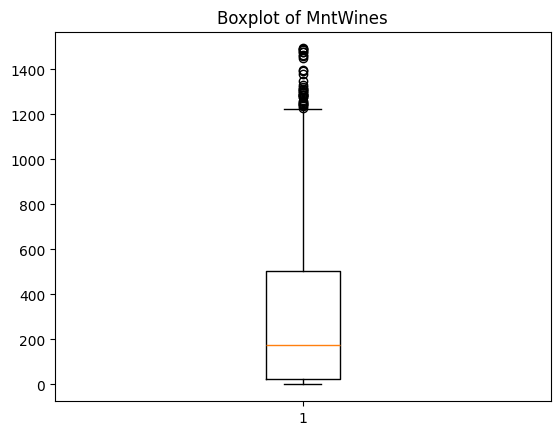

count    2232.000000
mean      304.930108
std       336.784950
min         0.000000
25%        24.000000
50%       176.000000
75%       505.000000
max      1493.000000
Name: MntWines, dtype: float64


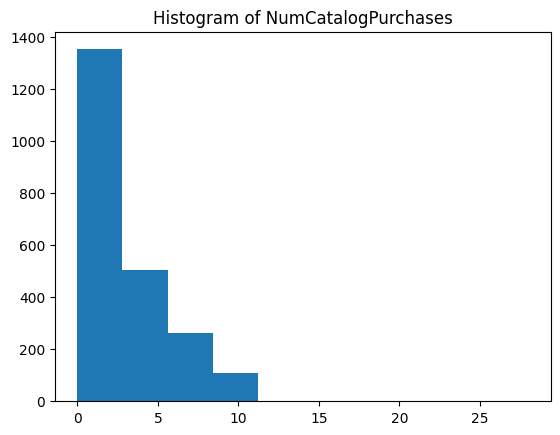

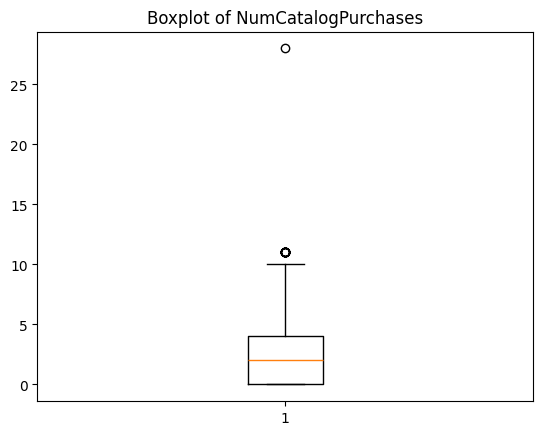

count    2232.000000
mean        2.636201
std         2.795959
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64


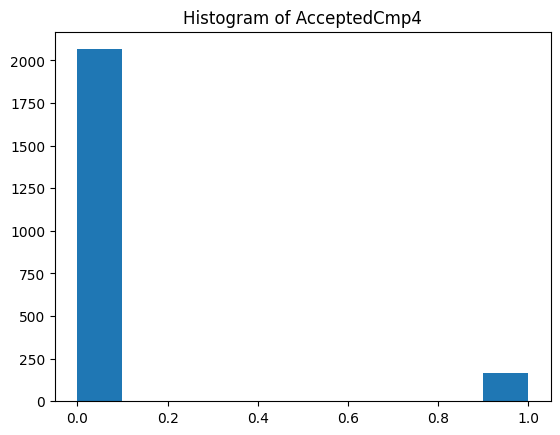

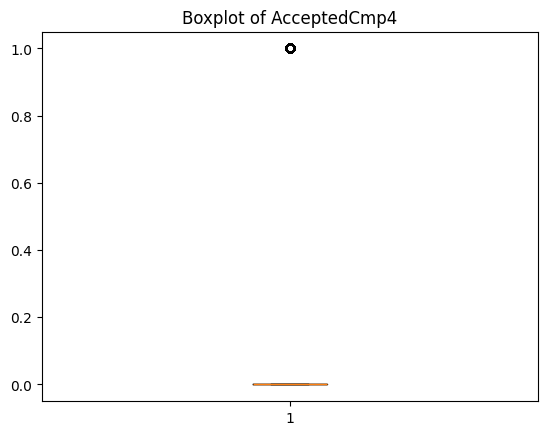

count    2232.000000
mean        0.074821
std         0.263161
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp4, dtype: float64


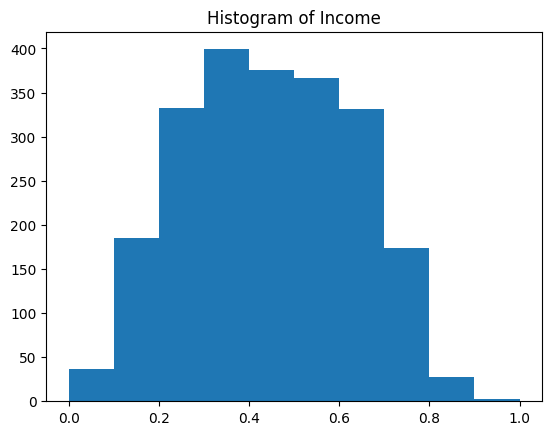

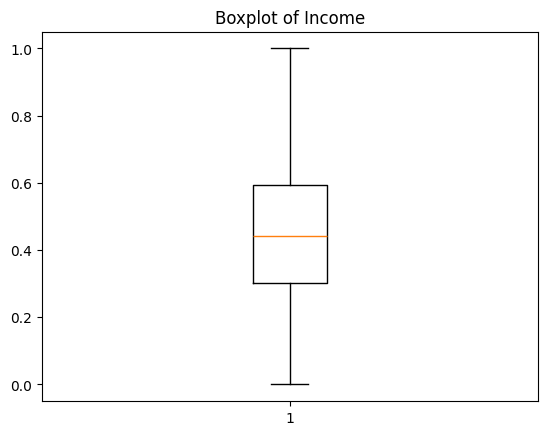

count    2232.000000
mean        0.445528
std         0.183937
min         0.000000
25%         0.300925
50%         0.443301
75%         0.592729
max         1.000000
Name: Income, dtype: float64


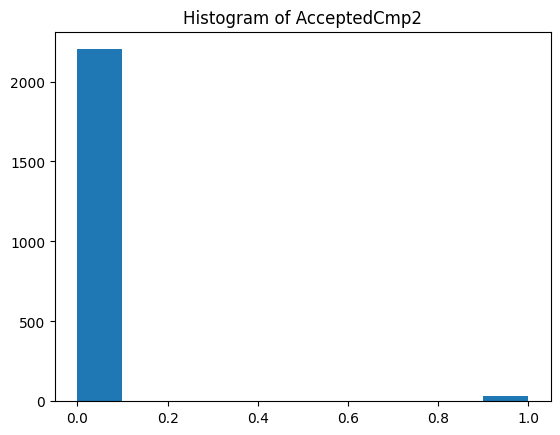

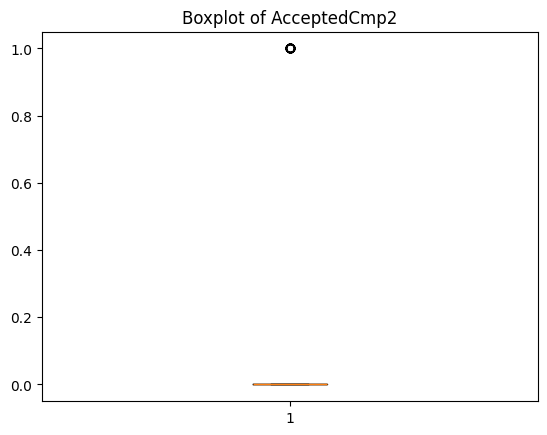

count    2232.000000
mean        0.013441
std         0.115179
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp2, dtype: float64


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 1. Univariate Analysis
# Explore individual features using histograms, box plots, and descriptive statistics.
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    plt.figure()
    plt.hist(df[column])
    plt.title(f"Histogram of {column}")
    plt.show()

    plt.figure()
    plt.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

    print(df[column].describe())

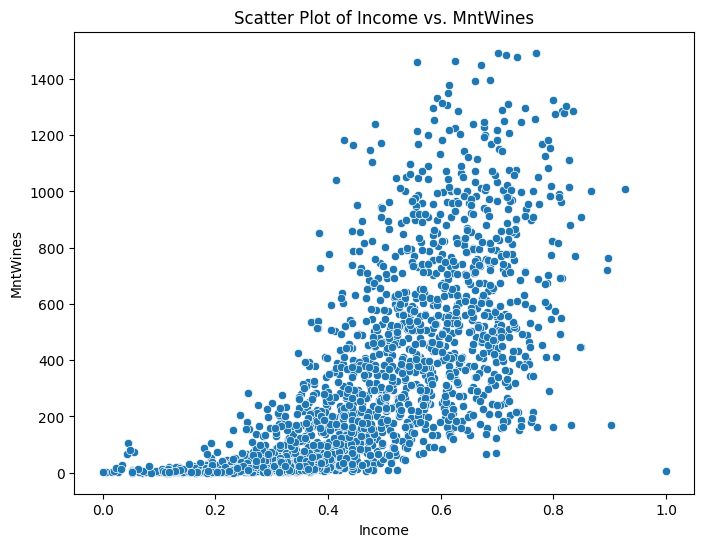

In [24]:
# Example: Create a scatter plot for 'Income' vs. 'MntWines'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntWines', data=df)
plt.title('Scatter Plot of Income vs. MntWines')
plt.show()


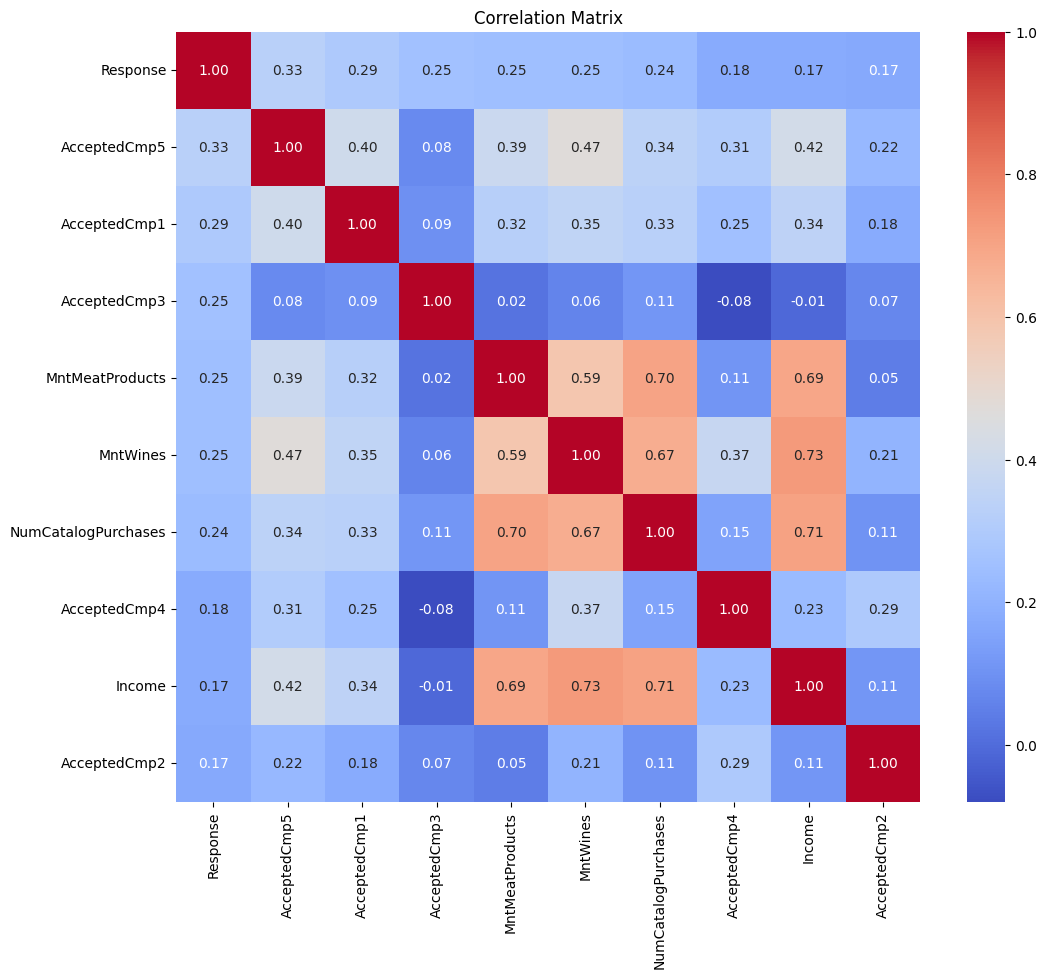

In [25]:
# Example: Create a heatmap for correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

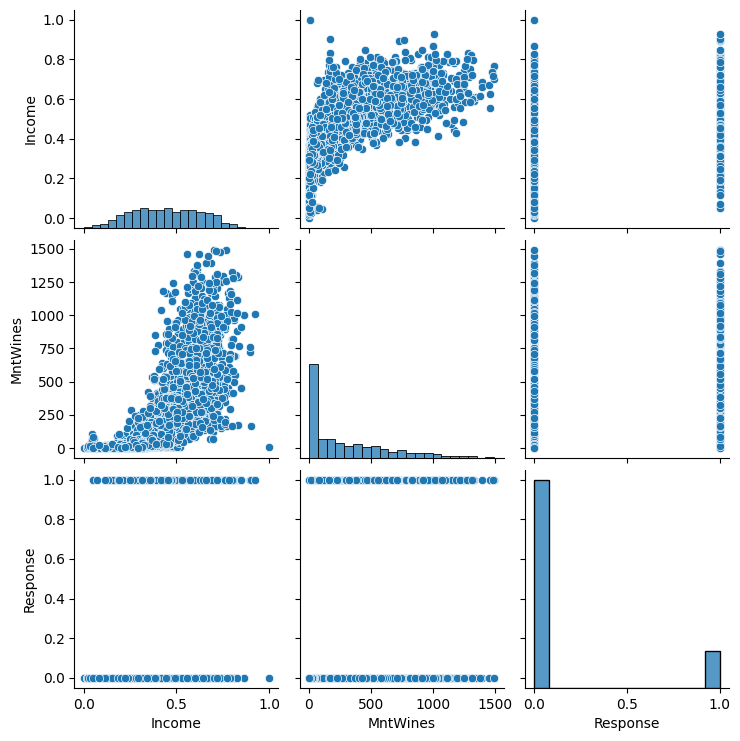

In [26]:
# 3. Multivariate Analysis
# Explore relationships between multiple features using pair plots, 3D plots, or other techniques.
# Example: Pair plot for selected features
sns.pairplot(df[['Income', 'MntWines', 'Response']])  # Removed 'Recency' as it's not in the DataFrame
plt.show()

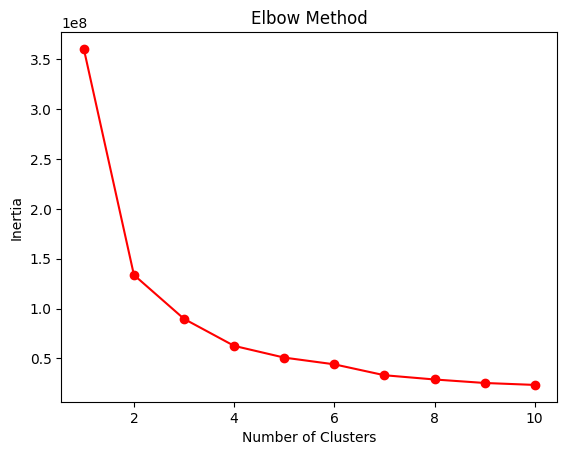

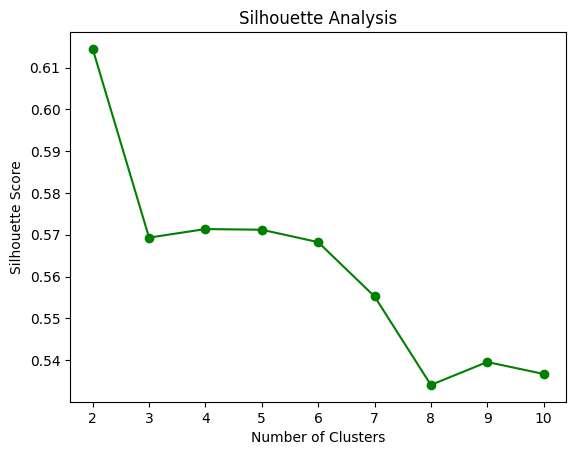

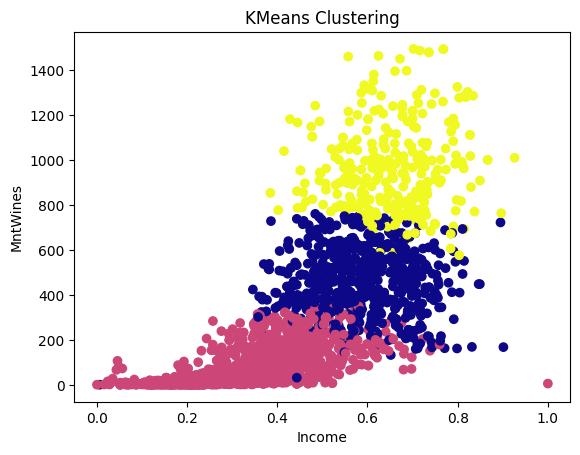

In [31]:
# prompt: k means clustering steps

# Assuming you have your preprocessed DataFrame 'df' with relevant features

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Choose the number of clusters (k)
# You can use the elbow method or silhouette analysis to find the optimal k

# Elbow Method
inertias = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df)
  inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):  # Silhouette score is not defined for k=1
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df)
  labels = kmeans.labels_
  silhouette_avg = silhouette_score(df, labels)
  silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o',color="green")
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


# 2. Initialize the KMeans model with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Replace 3 with your chosen k

# 3. Fit the model to your data
kmeans.fit(df)

# 4. Get the cluster labels for each data point
labels = kmeans.labels_

# 5. Get the cluster centroids
centroids = kmeans.cluster_centers_

# 6. Add the cluster labels to your DataFrame
df['cluster'] = labels

# 7. Analyze the clusters
# You can use various techniques to analyze the clusters:
# - Calculate the mean/median of features within each cluster
# - Visualize the clusters using scatter plots or other techniques
# - Compare the characteristics of different clusters

# Example: Calculate the mean of features for each cluster
cluster_means = df.groupby('cluster').mean()

# Example: Visualize clusters using a scatter plot (if you have 2 or 3 relevant features)
plt.scatter(df['Income'], df['MntWines'], c=labels, cmap='plasma')
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.title('KMeans Clustering')
plt.show()
